## Logistic Regression


Logistic regression is used to predict the **probability** that a value takes on one of a discrete number of values:

- benign/malignant
- credit risk/no credit risk

As such, even though it uses a **regression** to predict a value (the probability), it is typically used for **classification** problems.

## Predicting the malignancy of a tumor

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
target = pd.Series(data.target, name='Target')
features = pd.DataFrame(data.data, columns=data.feature_names)
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Let's look at one feature and see how it maps the target value

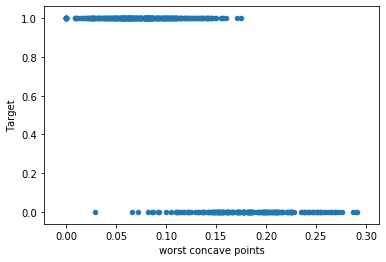

In [3]:
df = pd.concat([features, target], axis=1)
df.plot.scatter('worst concave points', 'Target')


# Why not use linear regression?

- It makes crazy predictions (does not map to 0..1)
- Outliers can influence it poorly

In [4]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(features[['worst concave points']], target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
ypred = linreg.predict(features[['worst concave points']])

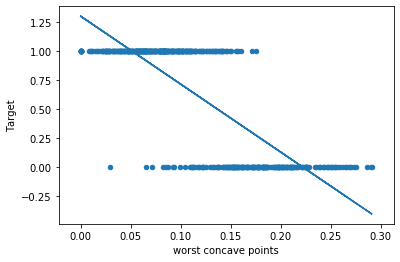

In [6]:
ax = plt.axes()
df.plot.scatter('worst concave points', 'Target', ax=ax)
plt.plot(df['worst concave points'], ypred)

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Interpretation: if "worst concave points" is under 0.05, the tumor is more than 100% likely to be benign

# Use the logistic function, instead

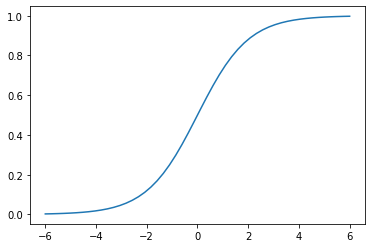

In [8]:
x = np.r_[-6:6:50j]
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y);

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(features[['worst concave points']], target)
ypred = logreg.predict_proba(features[['worst concave points']])[:,1]

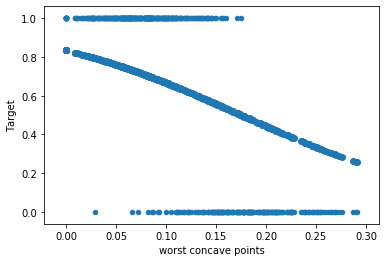

In [10]:
ax = plt.axes()
df.plot.scatter('worst concave points', 'Target', ax=ax)
plt.scatter(df['worst concave points'], ypred)

This is better, because it reflects the uncertainty about  predictions at either end of the spectrum.

In [23]:
logreg = LogisticRegression(solver='liblinear', C=1000)
logreg.fit(features, target)
ypred = logreg.predict(features)

In [24]:
logreg.score(features, target)

0.9718804920913884

Our corresponding linear regression (with threshold 0.5) doesn't do *quite* as well as a (somewhat) tuned logistic regression:

In [20]:
linreg = LinearRegression()
linreg.fit(features, target)
ypred = linreg.predict(features)

In [21]:
ypred_values = np.zeros(len(target))
ypred_values[ypred > 0.5] = 1

In [22]:
(ypred_values == target).mean()

0.9648506151142355

# Metric for probability

log-loss evaluates probability predictions

In [27]:
from sklearn import metrics

metrics.log_loss(target, logreg.predict_proba(features))

0.06485270433201609